<a href="https://colab.research.google.com/github/isabellamb/Analisis-Mercado-Inmobiliario/blob/main/An%C3%A1lisis_Mercado_Inmobiliario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISIS DE MERCADO INMOBILIARIO**

 
*  Parte 1, Análisis Exploratorio de Datos sobre este dataset.
* Parte 2, Utiliando herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vamos a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).
 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos ayudarían a trabajar en el problema?¿Por qué?



Datos a tener en cuenta: características de la propiedad


1.   Ubicación/estrato: tener en cuenta si se enuentra en una zona residencial, comercial, si la zona es altamente demandada, seguridad, etc.
2.   Tipo de inmueble: determina el uso.
3.   Número de habitaciones/baño: diferentes usos, comodidad, lujo.
4.   Área(cubierta/no cbierta): precio por metro cuadrado.
5.   Antiguedad: determina estado de conservación.(remodelaciones), calidad del diseño y de la construcciones.
6.   Mercado inmobiliario: relación oferta y demanda.
7.   Características especiales: Si se cuenta con istalaciones especiales, vistas, acceso a vías, historia, etc.
Las caracteristicas correspondientes a la vivienda pueden ser proporcionadas por el propietario y lo relacionado con el mercado pueden ser obtenidas a partir de un breve estudio/analisis de las propiedades de la zona.



## **1.Análisis Exploratorio de Datos**

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?


**Comentarios sobre el dataset** 


1. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

2. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



In [ ]:
# importamos las librerías que utilizaremos para el analisis exploratorio 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# leemos el dataset cargando el archivo excel y le damos un nuevo nombre "properati"
properati = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
properati.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
# determinamos el tamaño del dataset
print("la dimension de los datos de properati es (#filas y #colum):", properati.shape)

la dimension de los datos de properati es (#filas y #colum): (146660, 19)


### **1.1.Valores Faltantes:** 

In [ ]:
# determinamos los tipos de datos manejamos en nuestro dataset para su posterior uso
properati.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [ ]:
# Determinamos si hay datos faltantes y cuantos hay por columna
print("El número de valores faltantes por columnas para properti es:\n", properati.isna().sum(), sep = "")


El número de valores faltantes por columnas para properti es:
start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


### **1.2. Tipos de propiedad:** 
¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. 

In [ ]:
# agrupamos nuestros datos de acuerdo al tipo de propiedad "property_type" y contamos el numero de instancias para cada una
tipos_propiedad = properati.groupby("property_type").size().reset_index(name="numero de instancias")
tipos_propiedad


,property_type,numero de instancias
0,Casa,21521
1,Casa de campo,322
2,Cochera,259
3,Departamento,107326
4,Depósito,265
5,Local comercial,325
6,Lote,1312
7,Oficina,658
8,Otro,374
9,PH,14298


para determinar el numero de tipos de propiedades que se publican contamos las intancias del dataframe (tipos_propiedad) resultado de la anterior agrupación










In [ ]:
print("El número de propiedades publicadas es:")
len(tipos_propiedad.index)

El número de propiedades publicadas es:


10

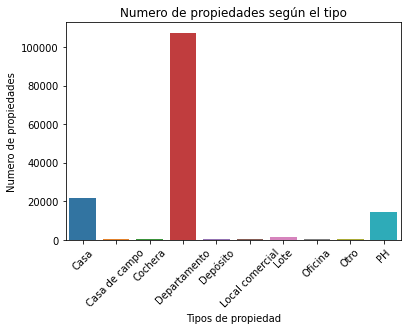

In [ ]:
# mediante un grafico de barras representamos el numero de propiedades según su tipo
tipos_propiedad.dtypes
sb.barplot(x = "property_type", y ="numero de instancias", data = tipos_propiedad)
plt.xlabel("Tipos de propiedad")
plt.ylabel("Numero de propiedades")
plt.title("Numero de propiedades según el tipo")
plt.xticks(rotation = 45)


plt.show( )

En el grafico anterior se observa que de los 10 tipos de propiedades publicadas, la mayoria son de: departamentos, casas,  y PH, respectivamente.


### **1.3. Ubicación de las publicaciones/propiedades**
 ¿De qué regiones son las publicaciones? se grafican con barras  las variables `l2` y `l3` agrupando los datos dependiendo de las regiones l2 y l3, y luego contamos las instancias por región.

In [ ]:
#agrupamos los datos dependiendo de las regiones l2 y l3.
regiones_l2 = properati.groupby("l2").size().reset_index(name="numero de publicaciones")
regiones_l2

,l2,numero de publicaciones
0,Bs.As. G.B.A. Zona Norte,24282
1,Bs.As. G.B.A. Zona Oeste,12666
2,Bs.As. G.B.A. Zona Sur,17173
3,Capital Federal,92539


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

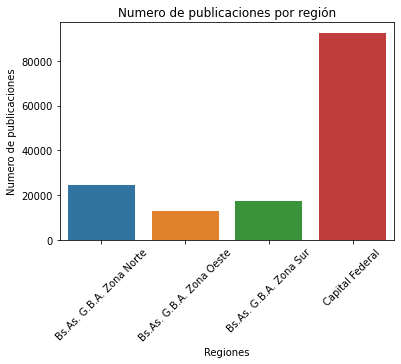

In [ ]:
# graficamos mediante barras el numero de publicaciones según las regiones l2 
sb.barplot(x = "l2", y ="numero de publicaciones", data = regiones_l2)
plt.xlabel("Regiones")
plt.ylabel("Numero de publicaciones")
plt.title("Numero de publicaciones por región")
plt.xticks(rotation = 45)

 Se observa que la mayoria de publicaciones (92539)corresponden a la CAPITAL FEDERAL.

Se repite el paso anterior para las regiones l3, se agrupan y cuentan las instancias. 

In [ ]:
regiones_l3 = properati.groupby("l3").size().reset_index(name="numero de publicaciones")
regiones_l3

,l3,numero de publicaciones
0,Abasto,462
1,Agronomía,165
2,Almagro,7527
3,Almirante Brown,1228
4,Avellaneda,1370
...,...,...
84,Villa Riachuelo,42
85,Villa Santa Rita,354
86,Villa Soldati,69
87,Villa Urquiza,3339


debido al gran número de regiones, en este paso las organizamos en orden descendentes para poder visualizar las regiones con más instancias y elegir un valor limite para reducir los datos 

In [ ]:
regiones_l3.sort_values('numero de publicaciones', ascending=False)

,l3,numero de publicaciones
48,Palermo,13073
70,Tigre,8718
2,Almagro,7527
8,Belgrano,6935
12,Caballito,6650
...,...,...
14,Cañuelas,108
86,Villa Soldati,69
84,Villa Riachuelo,42
39,Marcos Paz,35


El dataframe resultante filtramos las regiones con >= 6650 publicaciones para evaluar las más representativas, ya que reesulta impractico un grafico con tantas regiones.

In [ ]:
regiones_l3_principales = regiones_l3["numero de publicaciones"] >= 6650
regiones_l3_filtro = regiones_l3[regiones_l3_principales]
regiones_l3_filtro.head()

,l3,numero de publicaciones
2,Almagro,7527
8,Belgrano,6935
12,Caballito,6650
48,Palermo,13073
70,Tigre,8718


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

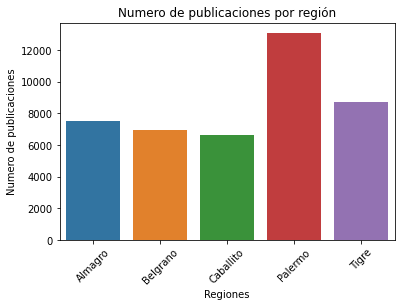

In [ ]:
# graficamos las 5 regiones principales de l3.
sb.barplot(x = "l3", y ="numero de publicaciones", data = regiones_l3_filtro)
plt.xlabel("Regiones")
plt.ylabel("Numero de publicaciones")
plt.title("Numero de publicaciones por región")
plt.xticks(rotation = 45)

Se observa que para l3 las ubicación con más publicaciones es PALERMO con 13073. Luego de comparar y analizar tanto las regiones l2 y le, se observa que la ubicación de donde provienen el mayor numero de publicaciones es la CAPITAL FEDERAL. 

### **1.4.Filtrando el Dataset:** 
A partir de los resultados del punto 2. y 3., se seleccionan las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Se Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones y se imprime su `shape`.

filtramos el dataset properati por propiedades de tipo: Casa, Departamento y PH, de la capital Federal, y lo llamamos "condiciones"

In [ ]:
condiciones = properati[properati.property_type.isin(["Departamento", "Casa", "PH"]) & properati.l2.isin(["Capital Federal"])]
condiciones.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


In [ ]:
# determinamos el numero fe filas y columnas del dataset filtrado
condiciones.shape
print("la dimension de los datos del nuevo dataset filtrado es (#filas y #colum):", condiciones.shape)

la dimension de los datos del nuevo dataset filtrado es (#filas y #colum): (91485, 19)




### **1.5.Distribuciones y relaciones de a pares:**
Se estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, se tiene en cuenta:

    1. Los estadísticos que brindarán una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    2. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Se estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    3. Lo mismo ocurre con valores de superficie total muy chico.
    4. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    5. El rango de precios que toman las propiedades es muy amplio. Se estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    6. Una vez filtrado el dataset, se puede utilizar la función `pairplot` de Seaborn.

In [ ]:
# obtención de estadisticos con el fin de hacer un analisis inicial.
numeric_properati = condiciones[["rooms",	"bedrooms", "bathrooms",	"surface_total",	"surface_covered",	"price"]]
numeric_properati.describe()


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


en la tabla anterior se observan los estadiscticos de las variables de interes para las principales tipos de propiedades de la Capital Federal, en este primer analisis se observan valores que podriamos considerar fuera de los rangos normales en todas las variables dado que los valores maximos estan muy alejados de la media y de los ultimos dos cuartiles.


> > > Se agrupa por tipo de propiedad y se obtiene el promedio, el valor maximo y minimo para las 6 variables en estudio:






In [ ]:
estadisticos_tipo_propiedad = properati.groupby("property_type").agg({'rooms': ['mean', 'min', 'max']})
estadisticos_tipo_propiedad


rooms           
                     mean  min   max
property_type                       
Casa             4.499652  1.0  30.0
Casa de campo    4.186335  1.0  13.0
Cochera          1.011583  1.0   2.0
Departamento     2.756471  1.0  32.0
Depósito         1.226415  1.0   7.0
Local comercial  1.566154  1.0   8.0
Lote             2.323933  1.0  18.0
Oficina          2.369301  1.0  16.0
Otro             3.842246  1.0  16.0
PH               3.533291  1.0  35.0

Para la variable "rooms" los valores maximos estan bastante alejados del valor promedio para los tres tipos principales de propiedades.

In [ ]:
estadisticos_tipo_propiedad = properati.groupby("property_type").agg({'bedrooms': ['mean', 'min', 'max']})
estadisticos_tipo_propiedad

bedrooms           
                     mean  min   max
property_type                       
Casa             2.925654  0.0  15.0
Casa de campo    2.760870  0.0   6.0
Cochera          0.023166  0.0   1.0
Departamento     1.757813  0.0  15.0
Depósito         0.090566  0.0   4.0
Local comercial  0.418462  0.0   6.0
Lote             1.320122  0.0  12.0
Oficina          1.404255  0.0  14.0
Otro             2.497326  0.0  10.0
PH               2.419569  0.0  15.0

Para la variable "bedrooms" los valores maximos estan bastante alejados del valor promedio para los tres tipos principales de propiedades.

In [ ]:
estadisticos_tipo_propiedad = properati.groupby("property_type").agg({'bathrooms': ['mean', 'min', 'max']})
estadisticos_tipo_propiedad

bathrooms           
                     mean  min   max
property_type                       
Casa             2.137237  1.0  13.0
Casa de campo    2.016611  1.0   7.0
Cochera          1.222222  1.0   2.0
Departamento     1.508841  1.0  14.0
Depósito         1.750000  1.0   4.0
Local comercial  1.584416  1.0   7.0
Lote             1.811321  1.0  10.0
Oficina          1.500000  1.0  11.0
Otro             2.191057  1.0  10.0
PH               1.485057  1.0  11.0

Para la variable "bathrooms" los valores maximos estan bastante alejados del valor promedio para los tres tipos principales de propiedades.

In [ ]:
estadisticos_tipo_propiedad = properati.groupby("property_type").agg({'surface_total': ['mean', 'min', 'max']})
estadisticos_tipo_propiedad

surface_total                 
                         mean    min       max
property_type                                 
Casa               660.102807   11.0  169000.0
Casa de campo     4018.581395  120.0   87806.0
Cochera             13.500000   12.0      15.0
Departamento        99.191757   10.0  108960.0
Depósito           624.375000   20.0    2400.0
Local comercial    258.583333   26.0    2540.0
Lote              2481.002837   38.0  153800.0
Oficina             81.956853   15.0     453.0
Otro              8249.772727   38.0  193549.0
PH                 172.982074   10.0  126062.0

Para la variable "surface_total" los valores maximos estan bastante alejados del valor promedio para los tres tipos principales de propiedades.

In [ ]:
estadisticos_tipo_propiedad = properati.groupby("property_type").agg({'surface_covered': ['mean', 'min', 'max']})
estadisticos_tipo_propiedad

surface_covered                
                           mean   min       max
property_type                                  
Casa                 249.149856   1.0   75792.0
Casa de campo        315.228682  59.0   10000.0
Cochera               13.500000  12.0      15.0
Departamento          85.276315   1.0  104890.0
Depósito             347.428571  20.0     580.0
Local comercial      156.909091  26.0     498.0
Lote                 215.393939  42.0     578.0
Oficina               78.763926  14.0     542.0
Otro                 202.549550  10.0    1700.0
PH                   130.319805   1.0  126062.0

Para la variable "surface_covered" los valores maximos estan bastante alejados del valor promedio para los tres tipos principales de propiedades.

In [ ]:
estadisticos_tipo_propiedad = properati.groupby("property_type").agg({'price': ['mean', 'min', 'max']})
estadisticos_tipo_propiedad

price                     
                          mean      min         max
property_type                                      
Casa             275932.848427  10000.0  11111111.0
Casa de campo    212242.826087  57000.0   1300000.0
Cochera           24255.984556   8900.0    210000.0
Departamento     236746.743110   6000.0  32434232.0
Depósito         885932.075472  15000.0  11000000.0
Local comercial  449184.064615  10000.0  10920000.0
Lote             386830.370427   5500.0   5900000.0
Oficina          183674.572948  25000.0   2500000.0
Otro             671686.697861  35000.0  26653528.0
PH               188493.522800  13000.0   1750000.0

 Para la variable "price" los valores maximos estan bastante alejados del valor promedio en el caso de los tres tipos principales de propiedades.

 >>>Con el fin de apoyar la hipotesis inicial sobre los valores atipicos, se analiza cada variable para cada tipo de propiedad y se confirma que efectivamente es necesario depurar estos datos.
Basados en el analisis de los estadisticos de las variables de interes, ahora se estudiará la distribución de las variables surface_total y Price 







Text(0.5, 1.0, 'BoxPlot surface_total sin elegir rango')

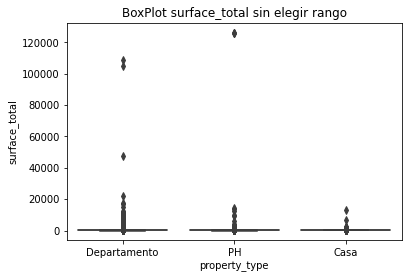

In [ ]:
# se grafica la distribución de surface_total mediante un boxplot
sb.boxplot(data = condiciones, x = 'property_type', y = "surface_total")
plt.title("BoxPlot surface_total sin elegir rango")

Dado que no es posible visualizar bien la distribución de la variable surface_total por la presencia de datos a tipicos muy por fuera del promedio, incluso del tercer cuartil se elije un rango para esta variable y volver a graficar su distribución (10-1000)























Text(0.5, 1.0, 'BoxPlot surface_total 10-1000')

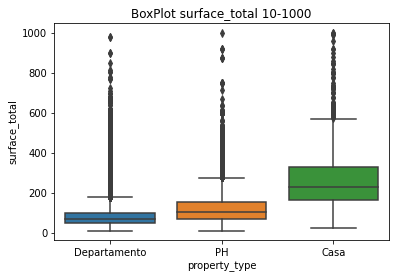

In [ ]:
condiciones_rango_st = condiciones[(condiciones["surface_total"] >= 10) & (condiciones["surface_total"] <= 1000)]
sb.boxplot(data = condiciones_rango_st, x = 'property_type', y = "surface_total")
plt.title("BoxPlot surface_total 10-1000")

Al graficar la distrubucion de *surface_total* se observan valores muy grandes que dificultan la visualización por lo que se elije un rango de (10-1000) basandonos en la valor minimo que toma esta variable en las principales propiedades y en en rango donde se concentra la mayor cantidad de datos.

---



Text(0.5, 1.0, 'BoxPlot price sin elegir rango')

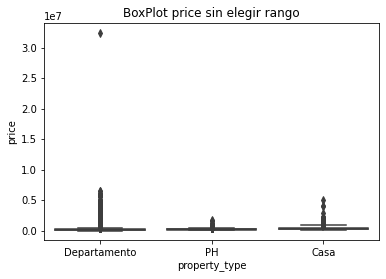

In [ ]:
# se grafica la distribución de price mediante un boxplot
sb.boxplot(data = condiciones, x = 'property_type', y = "price")
plt.title("BoxPlot price sin elegir rango")


Dado que no es posible visualizar bien la distribución de la variable  por la presencia de datos a tipicos muy por fuera del promedio, incluso del tercer cuartil se elije un rango para esta variable y volver a graficar su distribución (<1000)

Text(0.5, 1.0, 'BoxPlot price 6000-4000000')

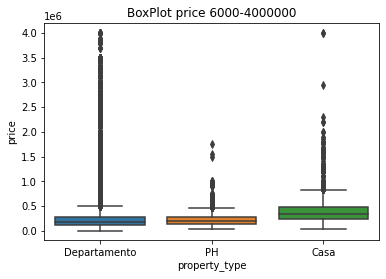

In [ ]:
condiciones_rango_p = condiciones[(condiciones["price"] >= 6000) & (condiciones["price"] <= 4000000)]
sb.boxplot(data = condiciones_rango_p, x = 'property_type', y = "price")
plt.title("BoxPlot price 6000-4000000")

Al graficar la distrubucion de *price* se observa un amplio rango de valores  que dificultan la visualización por lo que se elije un rango de (6000-4000000) basandonos en la valor minimo que toma esta variable en las principales propiedades y en en rango donde se concentra la mayor cantidad de datos




teniendo en cuenta los nuevos rangos de surface_total y price, se filtra el dataset para que surface_total > surface_covered


In [ ]:
properati_filtra = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
properati_filtra = properati_filtra[properati_filtra.property_type.isin(["Departamento", "Casa", "PH"]) & properati_filtra.l2.isin(["Capital Federal"])]
properati_filtra = properati_filtra[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]
properati_filtra = properati_filtra[(properati_filtra["surface_total"] >= 10) & (properati_filtra["surface_total"] <= 1000) & (properati_filtra["price"] <= 4000000)]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'price')

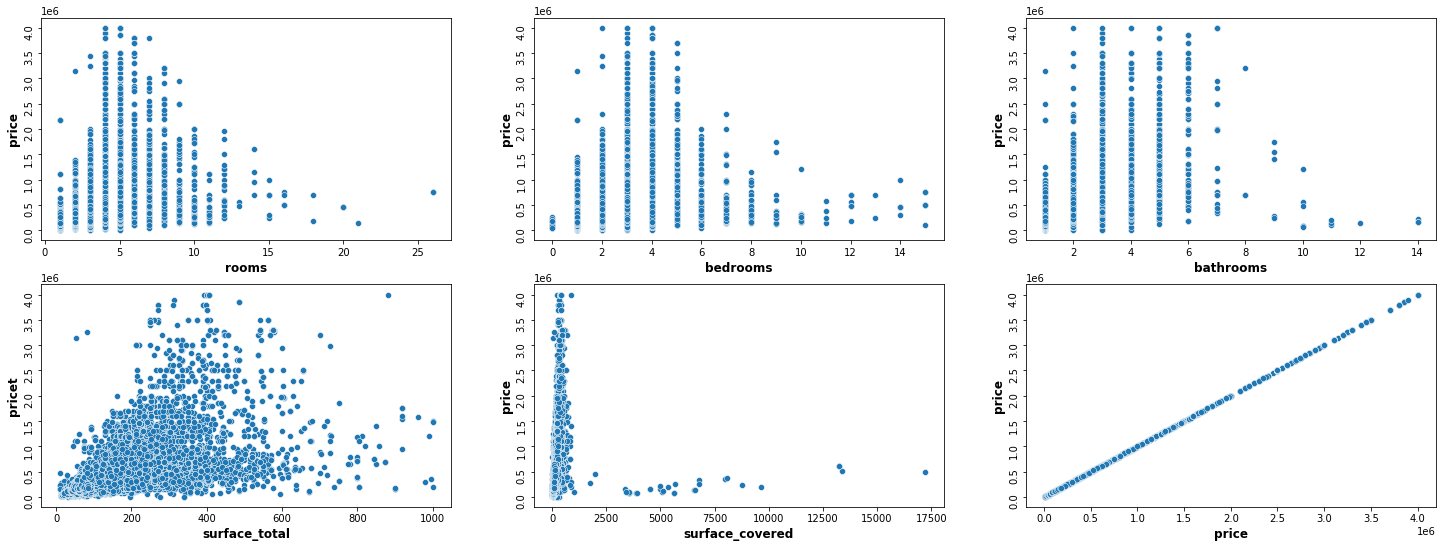

In [ ]:
# graficamos la distribución de las variables de interes. 
plt.figure(figsize = (25,9))

plt.subplot(2,3,1)
sb.scatterplot(properati_filtra['rooms'], properati_filtra['price'])
plt.yticks(rotation = 90)
plt.xlabel("rooms", fontweight = "black", fontsize = 12)
plt.ylabel("price", fontweight = "black", fontsize = 12)

plt.subplot(2,3,2)
sb.scatterplot(properati_filtra['bedrooms'], properati_filtra['price'])
plt.yticks(rotation = 90)
plt.xlabel("bedrooms", fontweight = "black", fontsize = 12)
plt.ylabel("price", fontweight = "black", fontsize = 12)

plt.subplot(2,3,3)
sb.scatterplot(properati_filtra['bathrooms'], properati_filtra['price'])
plt.yticks(rotation = 90)
plt.xlabel("bathrooms", fontweight = "black", fontsize = 12)
plt.ylabel("price", fontweight = "black", fontsize = 12)

plt.subplot(2,3,4)
sb.scatterplot(properati_filtra['surface_total'], properati_filtra['price'])
plt.yticks(rotation = 90)
plt.xlabel("surface_total", fontweight = "black", fontsize = 12)
plt.ylabel("pricet", fontweight = "black", fontsize = 12)


plt.subplot(2,3,5)
sb.scatterplot(properati_filtra['surface_covered'], properati_filtra['price'])
plt.yticks(rotation = 90)
plt.xlabel("surface_covered", fontweight = "black", fontsize = 12)
plt.ylabel("price", fontweight = "black", fontsize = 12)

plt.subplot(2,3,6)
sb.scatterplot(properati_filtra['price'], properati_filtra['price'])
plt.yticks(rotation = 90)
plt.xlabel("price", fontweight = "black", fontsize = 12)
plt.ylabel("price", fontweight = "black", fontsize = 12)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


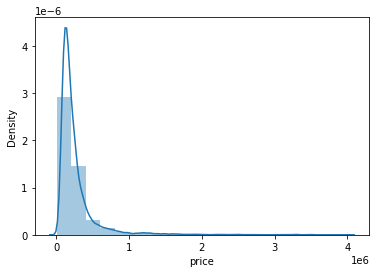

In [ ]:
# graficamos la distribución de la variable price
sb.distplot(properati_filtra['price'], bins = 20)#, hist = True,  kde = False, rug = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


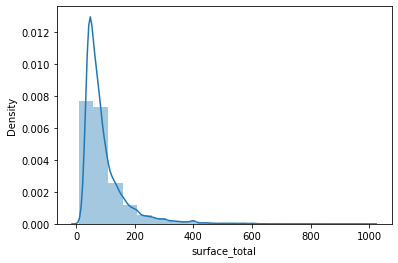

In [ ]:
# graficamos la distribución de la variable surface_total
sb.distplot(properati_filtra['surface_total'], bins = 20)#, hist = True,  kde = False, rug = True)

 De los graficos se observa que la variable con mayor correlación con el precio es la *surface_total*. Se observa también una distribución más uniforme y normal  de las variables surface total y precio, una vez elegidos los rangos de trabajo descartando así los valores atipicos.

### **1.6.Correlaciones:** 
Se estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [ ]:
# se obtienen las correlaciones de las variables
cor = properati_filtra.corr()
cor

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925990,0.602097,0.724927,0.305545,0.480150
bedrooms,0.925990,1.000000,0.605270,0.694940,0.292316,0.442736
bathrooms,0.602097,0.605270,1.000000,0.652135,0.275965,0.638805
surface_total,0.724927,0.694940,0.652135,1.000000,0.377439,0.685419
surface_covered,0.305545,0.292316,0.275965,0.377439,1.000000,0.299266
price,0.480150,0.442736,0.638805,0.685419,0.299266,1.000000


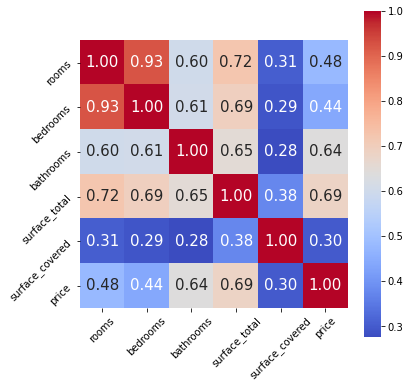

In [ ]:
# graficamos las correlaciones
plt.figure(figsize=(6,6))
sb.heatmap(cor, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= properati_filtra.columns, 
           yticklabels= properati_filtra.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

 Al analizar las correlaciones para todos los tipos de propiedad se observa que la variable precio tiene una mayor relación con *surface_total* y *bathrooms* por lo que parecen ser las mejores variables predictoras.










Ahora analizaremos la corrlación de las variables para cada tipo de propiedad(las 3 principales) por separado, para ver si tienen el mismo comportamiento

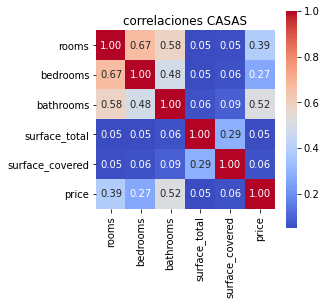

In [ ]:
casas = properati[properati.property_type.isin(["Casa"])]
numeric_casas = casas[["rooms",	"bedrooms", "bathrooms",	"surface_total",	"surface_covered",	"price"]]
c = numeric_casas.corr()
# graficamos las correlaciones
plt.figure(figsize=(4,4))
sb.heatmap(c, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= properati_filtra.columns, 
           yticklabels= properati_filtra.columns,
           cmap= 'coolwarm')
plt.title("correlaciones CASAS")
plt.show()

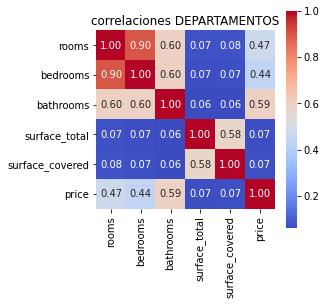

In [ ]:
departamentos = properati[properati.property_type.isin(["Departamento"])]
numeric_departamentos = departamentos[["rooms",	"bedrooms", "bathrooms",	"surface_total",	"surface_covered",	"price"]]
d = numeric_departamentos.corr()
# graficamos las correlaciones
plt.figure(figsize=(4,4))
sb.heatmap(d, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= properati_filtra.columns, 
           yticklabels= properati_filtra.columns,
           cmap= 'coolwarm')
plt.title("correlaciones DEPARTAMENTOS")
plt.show()

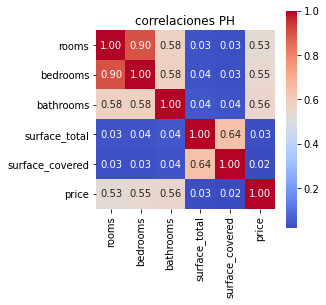

In [ ]:
phs = properati[properati.property_type.isin(["PH"])]
numeric_phs = phs[["rooms",	"bedrooms", "bathrooms",	"surface_total",	"surface_covered",	"price"]]
p = numeric_phs.corr()
# graficamos las correlaciones
plt.figure(figsize=(4,4))
sb.heatmap(p, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= properati_filtra.columns, 
           yticklabels= properati_filtra.columns,
           cmap= 'coolwarm')
plt.title("correlaciones PH")
plt.show()

 Al analizar las correlaciones por separado para cada tipo de propiedad se observa que a diferencia del enfoque general, en este caso la mayor relación con la variable *precio* la tiene *bathrooms* para los 3 tipos de propiedad, y en estos casos la variable *surface_total* tiene muy baja relación. Por lo que para predecir se puede considerar apropiado incluir *rooms* y *bedrooms* ya que muestran una alta relación en el analisis por propiedad.

### **1.7. Desafío**

¿Que tipo de propiedad es la mas costosa?



In [ ]:
prom_precio_tipo_propiedad = properati.groupby("property_type").agg({'price': ['mean']})
prom_precio_tipo_propiedad

,price
,mean
property_type,
Casa,275932.848427
Casa de campo,212242.826087
Cochera,24255.984556
Departamento,236746.743110
Depósito,885932.075472
Local comercial,449184.064615
Lote,386830.370427
Oficina,183674.572948


las propiedades mas costosas son los depositos.

In [ ]:
# determinar tiempo de venta de las propiedades publicadas

In [ ]:
properati["start_date"] = pd.to_datetime(properati["start_date"], errors = "coerce")
properati["end_date"] = pd.to_datetime(properati["end_date"], errors = "coerce")
properati["created_on"] = pd.to_datetime(properati["created_on"], errors = "coerce")
properati.dtypes

start_date         datetime64[ns]
end_date           datetime64[ns]
created_on         datetime64[ns]
lat                       float64
lon                       float64
l1                         object
l2                         object
l3                         object
rooms                     float64
bedrooms                  float64
bathrooms                 float64
surface_total             float64
surface_covered           float64
price                     float64
currency                   object
title                      object
description                object
property_type              object
operation_type             object
dtype: object

In [ ]:
properati["tiempo_venta"] = properati["end_date"] - properati["start_date"]
properati.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,tiempo_venta
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,67 days
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,35 days
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,15 days
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,67 days
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta,146 days


## **2. Modelo de Machine Learning**

En esta sección, se entrenarán dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, se debe:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, ¿Qué información no se está usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?




**Importante:** para asegurarnos de trabajar con un dataset apropiado, se vuelven a cargar los datos y se realiza el siguiente filtrado:

1. Selección de las propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selección aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona de las propiedades cuya precio es menor 4000000 dólares.
1. Selección de las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarte de las  instacias con valores faltantes.



In [ ]:
# Cargamos y filtramos el dataset
properati_modelo = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
properati_modelo = properati_modelo[properati_modelo.property_type.isin(["Departamento", "Casa", "PH"]) & properati_modelo.l2.isin(["Capital Federal"])]
properati_modelo = properati_modelo[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]
properati_modelo = properati_modelo[(properati_modelo["surface_total"] >= 15) & (properati_modelo["surface_total"] <= 1000) & (properati_modelo["price"] <= 4000000)].dropna()


In [ ]:
print("El tamaño de la base de datos filtrada es:", properati_modelo.shape)



El tamaño de la base de datos filtrada es: (81019, 6)


### **2.1 Metrica de evaluación:**
 se elige la metrica más usada que es el error cuadratico medio(MSE), sin embargo el MSE tiene una desventaja; al estar el error elevado al cuadrado, no tiene la misma magnitud ni unidades que la variable por eso utilizaremos la raíz del error cuadrado promedio (RMSE). Para la elección del modelo se tendrá en cuenta el eror mas bajo posible. Lo ideal es que sea lo más cercano  a 0 posible, lo que indicaría que el valor predicho es igual al valor real. 


In [ ]:
# Se seleccionan las variables predictoras y a predecir.
x = properati_modelo.drop("price", axis=1)
y = properati_modelo.price


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=26)

### **2.2. Modelo Benchmark:**
 se elige modelo de regresión lineal y se evalua

In [ ]:
# MODELO 1:Generaremos  nuestro modelo Benchmark
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
print(linear_model.coef_, linear_model.intercept_)

[ 1.46553930e+04 -6.57906750e+04  1.34792032e+05  2.08413250e+03
  7.05144282e+01] -62550.44655139983


In [ ]:
y_test_pred = linear_model.predict(x_test)
y_train_pred = linear_model.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 203146.23605094946
Raíz del error cuadrático medio en Test: 192836.39347614837


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


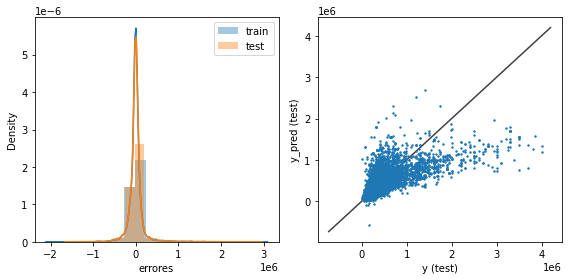

In [ ]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sb.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sb.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

### **2.3.MODELO 2:**
knn_2: Para intentar mejorar el modelo benchmark ahora no se tendrá en cuenta surface_covered como variable predictora


In [ ]:
x = properati_modelo[["rooms", "bedrooms", "bathrooms", "surface_total"]].values
y = properati_modelo.price

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=26)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 50
clf_knn = KNeighborsClassifier(n_neighbors =n_neighbors )

In [ ]:
clf_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [ ]:
y_train_pred = clf_knn.predict(x_train)
y_test_pred = clf_knn.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 250913.44781892415
Raíz del error cuadrático medio en Test: 250393.030938344


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


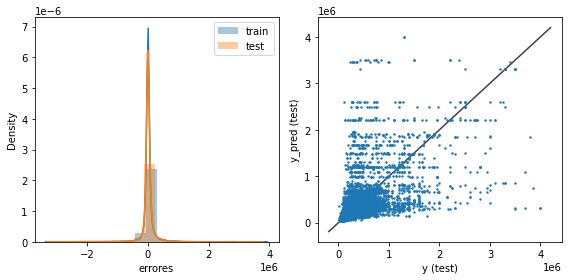

In [ ]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sb.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sb.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

 En este modelo se eliminó como variable predictora *surface_covered* dada la poca correlación que se encontró en el analis exploratorio, sin embargo se observó un aumento en el error RMSE con respecto al error obtenido en con el modelo benchmark donde se consideraban todas las variables como predictoras. 

### **2.4.MODELO 3:**
arbol_1: modelo arbol de decisión con todas las variables como predictoras


In [ ]:
x = properati_modelo.drop("price", axis=1)
y = properati_modelo.price

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=26)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(max_depth = 2, random_state=26)


In [ ]:
clf_tree.fit(x_train,y_train)

y_train_pred = clf_tree.predict(x_train)
y_test_pred = clf_tree.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 269457.68353835435
Raíz del error cuadrático medio en Test: 256216.63881310675


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


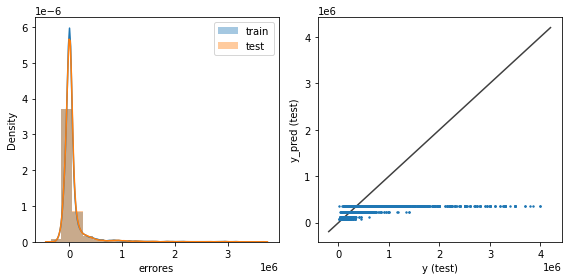

In [ ]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sb.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sb.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()


Se va a optimizar la profundidad a elegir:

In [ ]:
# Definimos las listas vacias para los valores de RMSE
lista_rmse_train = []
lista_rmse_test = []

# Lista de max_depth que a estudiar
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state=26)
    
    clf.fit(x_train,y_train)
    
    y_train_pred = clf.predict(x_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = clf.predict(x_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)

Text(0.5, 1.0, 'RMSE para distintas profundidades')

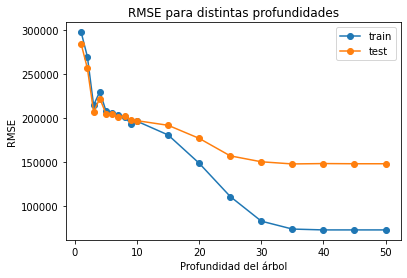

In [ ]:
plt.plot(max_depths,lista_rmse_train,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('RMSE')
plt.title("RMSE para distintas profundidades")

 Al analizar el modelo de arbol teniendo en cuenta todas las variables al igual que en el benchmark, se obtiene un aumento en el error. Una vez optimizado el hiperparametro de profundidad, en la grafica se observa que a una profundidad de 30 disminuye tanto el error en los datos entrenados como los de evaluación.

### **2.5.MODELO 3-1**
knn_3: se realiza un modelo de vecinos mas cercanos  teniendo en cuenta todas las variables predictoras con un k mayor. 


In [ ]:
x = properati_modelo.drop("price", axis=1)
y = properati_modelo.price

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=26)
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 100
clf_knn = KNeighborsClassifier(n_neighbors =n_neighbors )
clf_knn.fit(x_train,y_train)
y_train_pred = clf_knn.predict(x_train)
y_test_pred = clf_knn.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 260801.65890511687
Raíz del error cuadrático medio en Test: 254348.50840283264


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


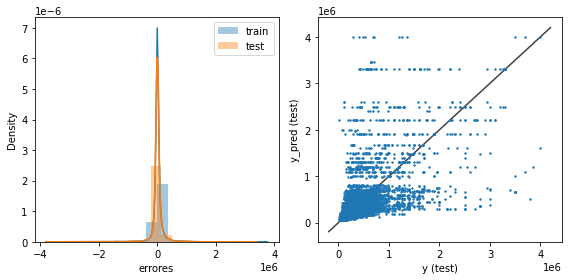

In [ ]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sb.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sb.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

 se construye un modelo de vecinos mas cercanos con k:100 y se obtiene un error que sigue siendo mayor al obtenido en el modelo benchmak.

Se optimiza el modelo para encontrar el mejor K:



In [ ]:
#Iteramos para encontrar el K optimo
# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train,y_train)
    
    y_train_pred = clf.predict(x_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    
    y_test_pred = clf.predict(x_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
  
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

Text(0.5, 1.0, 'RMSE para diferentes k')

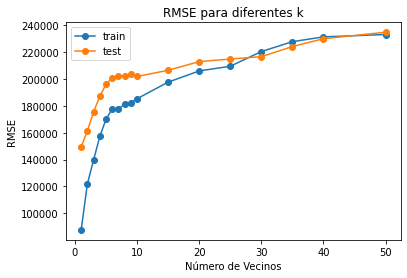

In [ ]:
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('RMSE')
plt.title("RMSE para diferentes k")

 para el modelo de vecino se observa que a medida que aumentamos los vecinos, se incrementa el error en la predicción. Se escoge k= 4 como el mas optimo ya que es donde se observa que el error disminuye tanto en train como en test.

Se corren los modelos con los parametros elegidos en las optimizaciones:

Raíz del error cuadrático medio en Train: 82597.31865380281
Raíz del error cuadrático medio en Test: 150042.3053648978


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


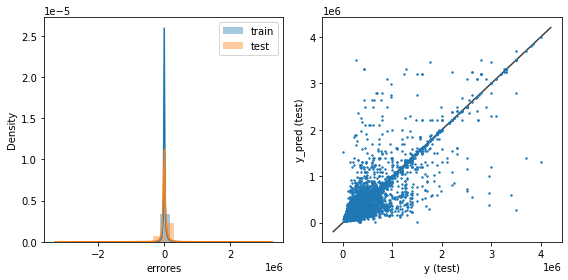

In [ ]:
# Modelo arbol profundidad=30 y todas las variables
x = properati_modelo.drop("price", axis=1)
y = properati_modelo.price

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=26)

from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(max_depth = 30, random_state=26)

clf_tree.fit(x_train,y_train)

y_train_pred = clf_tree.predict(x_train)
y_test_pred = clf_tree.predict(x_test)

from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sb.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sb.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

### **2.6. MODELO 3-2**
 Modelo vecinos con K= 4 y todas las variables

Raíz del error cuadrático medio en Train: 157250.4858399221
Raíz del error cuadrático medio en Test: 187061.42775229682


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


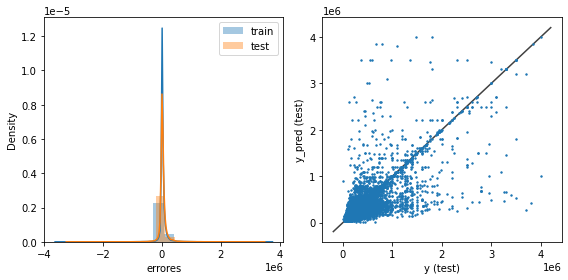

In [ ]:
x = properati_modelo.drop("price", axis=1)
y = properati_modelo.price

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=26)
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 4
clf_knn = KNeighborsClassifier(n_neighbors =n_neighbors )
clf_knn.fit(x_train,y_train)
y_train_pred = clf_knn.predict(x_train)
y_test_pred = clf_knn.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sb.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sb.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

## **3.Resultados**

In [ ]:
resultados_modelacion = {"modelos":["benchmark_reg_lineal", "vecinos","arbol","arbol","vecinos"],
                         "hyperparametros":["-","k 50", "profundidad 2","profundidad 30","k 4"],
                         "Numero de variables":[5,4,5,5,5],
                         "overfittig":["no","no","no","si","no"],
                        "RMSE Test":[192836,250393,256216,150042,187061]}
resultados = pd.DataFrame(resultados_modelacion)
resultados

,modelos,hyperparametros,Numero de variables,overfitig,RMSE Test
0,benchmark_reg_lineal,-,5,no,192836
1,vecinos,k 50,4,no,250393
2,arbol,profundidad 2,5,no,256216
3,arbol,profundidad 30,5,si,150042
4,vecinos,k 4,5,no,187061


***CONCLUSIÓN: *** Después de analizar el modelo benchmark y los modelos vecinos y arboles modelo estudiados se eslige el modelo de vecinos más cercanos con todas las variables como predictoras y un k = 4, luego de analizar los graficos de optimización de hiperparametros se encontró que este modelo es el que tiene el RMSE mas bajo sin presentar overfitting, sin embargo este valor obtenido (RMSE:187061) es alto si tenemos en cuenta los precios promedios de las principales tipos de propiedad ( casa 275932; departamento 236746; PH 188493). 
* Considerar el tipo de propiedad como variable predictora puede resultar en la obtención de un mejor modelo. Se recomiendaLos modelos presentados en este trabajo no consideran el tipode propiedad como una variable predictora lo que puede traducir en errores si tenemos en cuenta que durante el analisis exploratorio se encontró que para cada tipo de propiedad habían variables que resultaban más relevantes para el precio.